In [ ]:
!pip install scrapethat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
#from scrapethat import *
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_bar, coord_flip, element_text
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
from bs4 import BeautifulSoup

###Getting the link from the alberlet.hu website's first page's first element

In [ ]:
main_webpage = read_cloud('https://www.alberlet.hu/kiado_alberlet/ingatlan-tipus:lakas/megye:budapest/keres:normal/limit:24')

In [ ]:
main_webpage.select('.col-xl-3')

[<div class="col-12 col-sm-6 col-md-4 col-xl-3">
 <div class="advert" data-id="754620">
 <div class="labels">
 </div>
 <div class="image-container owl-carousel lazy-loading">
 <a class="item owl-lazy" data-src="/hirdetes-kep/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620-6356549@500x70xjpeg.webp" href="/kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620" target="_blank"></a>
 <a class="item owl-lazy" data-src="/hirdetes-kep/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620-6356563@500x70xjpeg.webp" href="/kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620" target="_blank"></a>
 <a class="item owl-lazy" data-src="/hirdetes-kep/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620-6356550@500x70xjpeg.webp" href="/kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620" target="_blank"></a>
 <a class="item owl-lazy" data-src="/hirdetes-kep/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620-6356551@500x70xjpeg.webp" href="/kiado_alberlet/budapest-XI-kerul

In [ ]:
main_webpage.select('.col-xl-3')[0].select('.advert-data')[0].select_one('a')['href']

'/kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620'

###Getting all the links from the first page

In [ ]:
links_from_first_page = [
    x.select_one('a')['href'] for x in main_webpage.select('.col-xl-3 .advert-data') if x.select_one('a')
]

print(links_from_first_page)

['/kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620', '/kiado_alberlet/budapest-II-kerulet-tarogato-ut-70m2-3-szoba_750733', '/kiado_alberlet/budapest-XIII-kerulet-lehel-utca-43m2-1-szoba_689994', '/kiado_alberlet/budapest-XI-kerulet-barazda-utca-49m2-2-szoba_751699', '/kiado_alberlet/budapest-XIII-kerulet-jasz-utca-50m2-2-szoba_755981', '/kiado_alberlet/budapest-XI-kerulet-zsombor-utca-42m2-2-szoba_756000', '/kiado_alberlet/budapest-XIII-kerulet-baber-utca-39m2-2-szoba_596521', '/kiado_alberlet/budapest-VIII-kerulet-jozsef-korut-32m2-1-szoba_730123', '/kiado_alberlet/budapest-XII-kerulet-bartha-utca-75m2-2-szoba_755124', '/kiado_alberlet/budapest-VII-kerulet-kazinczy-utca-50m2-2-szoba_749817', '/kiado_alberlet/budapest-VII-kerulet-dohany-utca-55m2-2-szoba_755199', '/kiado_alberlet/budapest-V-kerulet-molnar-utca-31m2-1-szoba_753239', '/kiado_alberlet/budapest-III-kerulet-bogdani-ut-35m2-1-szoba_753790', '/kiado_alberlet/budapest-XI-kerulet-dayka-gabor-utca-56m2-2-szoba_

In [ ]:
len(links_from_first_page)

24

In [ ]:
full_links = ['https://www.alberlet.hu/' + link for link in links_from_first_page]
full_links

['https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620',
 'https://www.alberlet.hu//kiado_alberlet/budapest-II-kerulet-tarogato-ut-70m2-3-szoba_750733',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-lehel-utca-43m2-1-szoba_689994',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-barazda-utca-49m2-2-szoba_751699',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-jasz-utca-50m2-2-szoba_755981',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-zsombor-utca-42m2-2-szoba_756000',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-baber-utca-39m2-2-szoba_596521',
 'https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-jozsef-korut-32m2-1-szoba_730123',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XII-kerulet-bartha-utca-75m2-2-szoba_755124',
 'https://www.alberlet.hu//kiado_alberlet/budapest-VII-kerulet-kazinczy-utca-50m2-2-szoba_749817',
 'https://www.alberlet.hu//kiad

###Getting links from other pages as well

In [ ]:
page = read_cloud('https://www.alberlet.hu/kiado_alberlet/page:2/ingatlan-tipus:lakas/megye:budapest/keres:normal/limit:24')
links_from_second_page = [
    x.select_one('a')['href'] for x in page.select('.col-xl-3 .advert-data') if x.select_one('a')
]

print(links_from_second_page)


['/kiado_alberlet/budapest-V-kerulet-petofi-sandor-utca-66m2-2-szoba_755961', '/kiado_alberlet/budapest-XX-kerulet-akacfa-utca-50m2-1-szoba_755945', '/kiado_alberlet/budapest-XIV-kerulet-thokoly-ut-32m2-1-szoba_540390', '/kiado_alberlet/budapest-XIV-kerulet-thokoly-ut-45m2-2-szoba_755643', '/kiado_alberlet/budapest-V-kerulet-karoly-korut-76m2-3-szoba_732801', '/kiado_alberlet/budapest-VII-kerulet-asboth-utca-40m2-1-szoba_755091', '/kiado_alberlet/budapest-XVI-kerulet-dobroce--66m2-2-szoba_755358', '/kiado_alberlet/budapest-XIV-kerulet-nezsider-park-49m2-2-szoba_754978', '/kiado_alberlet/budapest-XVI-kerulet-uzbeg-utca-53m2-2-szoba_755797', '/kiado_alberlet/budapest-XI-kerulet-barazda-utca-46m2-2-szoba_751111', '/kiado_alberlet/budapest-XII-kerulet-istenhegyi-ut-91m2-4-szoba_622615', '/kiado_alberlet/budapest-II-kerulet-szerena-ut-75m2-3-szoba_710661', '/kiado_alberlet/budapest-VI-kerulet-andrassy-ut-74m2-2-szoba_686156', '/kiado_alberlet/budapest-XIII-kerulet-tatra-utca-56m2-2-szoba_75

In [ ]:
all_links = []
for i in range(1,64):
    page = read_cloud(f'https://www.alberlet.hu/kiado_alberlet/page:{i}/ingatlan-tipus:lakas/megye:budapest/keres:normal/limit:24')
    links_from_other_pages = [x.select_one('a')['href'] for x in page.select('.col-xl-3 .advert-data') if x.select_one('a')]
    all_links.extend(links_from_other_pages)


In [ ]:
len(all_links)

1402

In [ ]:
full_links = ['https://www.alberlet.hu/' + link for link in all_links]
full_links

['https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_754620',
 'https://www.alberlet.hu//kiado_alberlet/budapest-II-kerulet-tarogato-ut-70m2-3-szoba_750733',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-lehel-utca-43m2-1-szoba_689994',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-barazda-utca-49m2-2-szoba_751699',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-jasz-utca-50m2-2-szoba_755981',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-zsombor-utca-42m2-2-szoba_756000',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-baber-utca-39m2-2-szoba_596521',
 'https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-jozsef-korut-32m2-1-szoba_730123',
 'https://www.alberlet.hu//kiado_alberlet/budapest-XII-kerulet-bartha-utca-75m2-2-szoba_755124',
 'https://www.alberlet.hu//kiado_alberlet/budapest-VII-kerulet-kazinczy-utca-50m2-2-szoba_749817',
 'https://www.alberlet.hu//kiad

###Getting data from each link

In [ ]:
t = read_cloud(full_links[1])

In [ ]:
t.select_one('#main-info .price').text

'300 000'

In [ ]:
t.select_one('#main-info .address').text

'Tárogató útBudapest, II. kerület'

In [ ]:
t.select_one('#main-info .mb-1').text

'2 szoba + 1 félszoba, 70 m2'

In [ ]:
t.select_one('.d-sm-block+ .mb-sm-0 .advert-info-text').text.strip()

'Üres, gépesített'

In [ ]:
t.select_one('.mb-sm-0:nth-child(2) .advert-info-text').text.strip()

'Kurucles'

In [ ]:
t.select_one('.mb-sm-0:nth-child(15) .advert-info-text').text.strip()

'Nem adott'

## Getting data from each link

In [ ]:
t.select_one('#collapse-details .mb-sm-0:nth-child(2) .advert-info-title').text.strip()

'Ingatlan állapota'

In [ ]:
def process_one_rent(link):
    t = read_cloud(link)

    data = {}
    data['Price'] = t.select_one('#main-info .price').text if t.select_one('#main-info .price') else 'Na'
    data['Address'] = t.select_one('#main-info .address').text if t.select_one('#main-info .address') else 'Na'
    data['rooms_and_sqrt'] = t.select_one('#main-info .mb-1').text if t.select_one('#main-info .mb-1') else 'Na'
    data['building_type_variable'] = t.select_one('.mb-sm-0:nth-child(1) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(1) .advert-info-title') else 'Na'
    data['building_type'] = t.select_one('.mb-sm-0:nth-child(1) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(1) .advert-info-text') else 'Na'
    data['neighbourhood_variable'] = t.select_one('.mb-sm-0:nth-child(2) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(2) .advert-info-title') else 'Na'
    data['neighbourhood'] = t.select_one('.mb-sm-0:nth-child(2) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(2) .advert-info-text') else 'Na'
    data['common_cost_variable'] = t.select_one('.mb-sm-0:nth-child(3) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(3) .advert-info-title') else 'Na'
    data['common_cost'] = t.select_one('.mb-sm-0:nth-child(3) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(3) .advert-info-text') else 'Na'
    data['utilities_variable'] = t.select_one('.mb-sm-0:nth-child(4) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(4) .advert-info-title') else 'Na'
    data['utilities'] = t.select_one('.mb-sm-0:nth-child(4) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(4) .advert-info-text') else 'Na'
    data['heating_type_variable'] = t.select_one('.mb-sm-0:nth-child(5) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(5) .advert-info-title') else 'Na'
    data['heating_type'] = t.select_one('.mb-sm-0:nth-child(5) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(5) .advert-info-text') else 'Na'
    data['furniture_variable'] = t.select_one('.mb-sm-0:nth-child(7) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(7) .advert-info-title') else 'Na'
    data['furniture'] = t.select_one('.mb-sm-0:nth-child(7) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(7) .advert-info-text') else 'Na'
    data['number_of_rooms_variable'] =t.select_one('.mb-sm-0:nth-child(8) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(8) .advert-info-title') else 'Na'
    data['number_of_rooms'] = t.select_one('.mb-sm-0:nth-child(8) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(8) .advert-info-text') else 'Na'
    data['floor_variable'] = t.select_one('.mb-sm-0:nth-child(9) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(9) .advert-info-title') else 'Na'
    data['floor'] = t.select_one('.mb-sm-0:nth-child(9) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(9) .advert-info-text') else 'Na'
    data['elavator_variable'] = t.select_one('.mb-sm-0:nth-child(10) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(10) .advert-info-title') else 'Na'
    data['elavator'] = t.select_one('.mb-sm-0:nth-child(10) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(10) .advert-info-text') else 'Na'
    data['sight_variable'] = t.select_one('.mb-sm-0:nth-child(11) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(11) .advert-info-title') else 'Na'
    data['sight'] = t.select_one('.mb-sm-0:nth-child(11) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(11) .advert-info-text') else 'Na'
    data['parking_variable'] = t.select_one('#collapse-details .mb-sm-0:nth-child(2) .advert-info-title').text.strip() if t.select_one('#collapse-details .mb-sm-0:nth-child(2) .advert-info-title') else 'Na'
    data['parking'] = t.select_one('#collapse-details .mb-sm-0:nth-child(2) .advert-info-text').text.strip() if t.select_one('#collapse-details .mb-sm-0:nth-child(2) .advert-info-text') else 'Na'
    data['number_of_floors_variable'] = t.select_one('#collapse-details .mb-sm-0~ .mb-sm-0+ .mb-sm-0 .advert-info-title').text.strip() if t.select_one('#collapse-details .mb-sm-0~ .mb-sm-0+ .mb-sm-0 .advert-info-title') else 'Na'
    data['number_of_floors'] = t.select_one('#collapse-details .mb-sm-0~ .mb-sm-0+ .mb-sm-0 .advert-info-text').text.strip() if t.select_one('#collapse-details .mb-sm-0~ .mb-sm-0+ .mb-sm-0 .advert-info-text') else 'Na'
    data['other'] = t.select_one('p:nth-child(1)').text.strip() if t.select_one('p:nth-child(1)') else 'Na'
    data['number_of_balconies_variable'] = t.select_one('.mb-sm-0:nth-child(13) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(13) .advert-info-title') else 'Na'
    data['number_of_balconies'] = t.select_one('.mb-sm-0:nth-child(13) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(13) .advert-info-text') else 'Na'
    data['american_kitchen_variable'] = t.select_one('.mb-sm-0:nth-child(14) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(14) .advert-info-title') else 'Na'
    data['american_kitchen'] = t.select_one('.mb-sm-0:nth-child(14) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(14) .advert-info-text') else 'Na'
    data['energy_performance_certificate_variable'] = t.select_one('.mb-sm-0:nth-child(16) .advert-info-title').text.strip() if t.select_one('.mb-sm-0:nth-child(16) .advert-info-title') else 'Na'
    data['energy_performance_certificate'] = t.select_one('.mb-sm-0:nth-child(16) .advert-info-text').text.strip() if t.select_one('.mb-sm-0:nth-child(16) .advert-info-text') else 'Na'
    data['link'] = link

    return data

In [ ]:
process_one_rent(full_links[2])

{'Price': '260 000',
 'Address': 'Lehel utcaBudapest, XIII. kerület',
 'rooms_and_sqrt': '1 szoba, 43 m2',
 'building_type_variable': 'Épület típusa',
 'building_type': 'Lakás',
 'neighbourhood_variable': 'Városrész',
 'neighbourhood': 'Angyalföld-Kertváros',
 'common_cost_variable': 'Közös költség',
 'common_cost': '20 000 Ft/hó',
 'utilities_variable': 'Rezsi költség',
 'utilities': '30 000 Ft/hó',
 'heating_type_variable': 'Fűtés',
 'heating_type': 'Házközponti',
 'furniture_variable': 'Minimum bérlési idő',
 'furniture': 'Legalább 1 év',
 'number_of_rooms_variable': 'Beköltözhető',
 'number_of_rooms': '2024-11-07',
 'floor_variable': 'Berendezés',
 'floor': 'Berendezett, gépesített',
 'elavator_variable': 'Emelet',
 'elavator': '5',
 'sight_variable': 'Lift',
 'sight': 'Van',
 'parking_variable': 'Építés éve',
 'parking': '2000',
 'number_of_floors_variable': 'Ingatlan állapota',
 'number_of_floors': 'Kiváló',
 'other': 'Lakás jellemzők: Aktív Internet, Fürdőkád, Ikea bútorok, Külö

In [ ]:
import pandas as pd
df=pd.DataFrame(list(map(process_one_rent, full_links[0:1512])))
df.head()

,Price,Address,rooms_and_sqrt,building_type_variable,building_type,neighbourhood_variable,neighbourhood,common_cost_variable,common_cost,utilities_variable,...,number_of_floors_variable,number_of_floors,other,number_of_balconies_variable,number_of_balconies,american_kitchen_variable,american_kitchen,energy_performance_certificate_variable,energy_performance_certificate,link
0,399 000,"Rahó utcaBudapest, XI. kerület","3 szoba, 75 m2",Épület típusa,Lakás,Városrész,Sasad,Fűtés,Cirkó,Minimum bérlési idő,...,Ingatlan állapota,Kiváló,"Lakás jellemzők: Fürdőkád, Zuhanyzó",Erkélyek száma,1,Amerikai konyha,Van,Kisállat,Igen,https://www.alberlet.hu//kiado_alberlet/budape...
1,300 000,"Tárogató útBudapest, II. kerület","2 szoba + 1 félszoba, 70 m2",Épület típusa,Lakás,Városrész,Kurucles,Fűtés,Cirkó,Minimum bérlési idő,...,Komfort fokozat,Duplakomfortos,Lakás jellemzők: Fürdőkád,Min. bérlési idő,Legalább 1 év,Mosógép van,Igen,Na,Na,https://www.alberlet.hu//kiado_alberlet/budape...
2,260 000,"Lehel utcaBudapest, XIII. kerület","1 szoba, 43 m2",Épület típusa,Lakás,Városrész,Angyalföld-Kertváros,Közös költség,20 000 Ft/hó,Rezsi költség,...,Ingatlan állapota,Kiváló,"Lakás jellemzők: Aktív Internet, Fürdőkád, Ike...",Kilátás,Utcai,Erkélyek száma,1,Min. bérlési idő,Legalább 1 év,https://www.alberlet.hu//kiado_alberlet/budape...
3,290 000,"Barázda utcaBudapest, XI. kerület","2 szoba, 49 m2",Épület típusa,Lakás,Városrész,Kelenföld,Közös költség,17 000 Ft/hó,Fűtés,...,Parkolási lehetőség,Mélygarázs,,Min. bérlési idő,Legalább 1 év,Energiatanúsítvány,Nem adott,Na,Na,https://www.alberlet.hu//kiado_alberlet/budape...
4,300 000,"Jász utcaBudapest, XIII. kerület","2 szoba, 50 m2",Épület típusa,Lakás,Városrész,Angyalföld,Közös költség,15 000 Ft/hó,Rezsi költség,...,Komfort fokozat,Összkomfortos,"Lakás jellemzők: Fürdőkád, Kertkapcsolat, Külö...",Kilátás,Kertre néző,Erkélyek száma,1,Min. bérlési idő,Legalább 1 év,https://www.alberlet.hu//kiado_alberlet/budape...


In [ ]:
df.to_excel('non_clean1216.xlsx', index=False)

In [ ]:
clean = df

In [1]:
import pandas as pd

In [2]:
clean = pd.read_excel('non_clean1216.xlsx', engine='openpyxl')

In [3]:
variable_columns = [col for col in clean.columns if '_variable' in col]

In [4]:
new_columns = set()
for var_col in variable_columns:
    pair_col = clean.columns[clean.columns.get_loc(var_col) + 1]
    new_columns.add(f'new_{pair_col}')
    new_columns.add(f'new_{var_col}')

for col in new_columns:
    clean[col] = None

In [5]:
data_dictionary = {
    'Városrész': {'new_value_col': 'new_neighbourhood'},
    'Közös költség': {'new_value_col': 'new_common_cost', 'new_var_col': 'new_common_cost_variable'},
    'Rezsi költség': {'new_value_col': 'new_utilities', 'new_var_col': 'new_utilities_variable'},
    'Kaució': {'new_value_col': 'new_common_cost', 'new_var_col': 'new_common_cost_variable'},
    'Épület típusa' : {'new_value_col': 'new_building_type', 'new_var_col': 'new_building_type_variable'},
    'Fűtés': {'new_value_col': 'new_heating_type', 'new_var_col': 'new_heating_type_variable'},
    'Berendezés': {'new_value_col': 'new_furniture', 'new_var_col': 'new_furniture_variable'},
    'Különnyíló szoba': {'new_value_col': 'new_number_of_rooms', 'new_var_col': 'new_number_of_rooms_variable'},
    'Emelet': {'new_value_col': 'new_floor', 'new_var_col': 'new_floor_variable'},
    'Lift': {'new_value_col': 'new_elavator', 'new_var_col': 'new_elavator_variable'},
    'Kilátás': {'new_value_col': 'new_sight', 'new_var_col': 'new_sight_variable'},
    'Energiatanúsítvány': {'new_value_col': 'new_energy_performance_certificate', 'new_var_col': 'new_energy_performance_certificate_variable'},
    'Amerikai konyha': {'new_value_col': 'new_american_kitchen', 'new_var_col': 'new_american_kitchen_variable'},
    'Erkélyek száma' : {'new_value_col': 'new_number_of_balconies', 'new_var_col': 'new_number_of_balconies_variable'},
    'Épület szintjei': {'new_value_col': 'new_number_of_floors', 'new_var_col': 'new_number_of_floors_variable'},
    'Parkolási lehetőség': {'new_value_col': 'new_parking', 'new_var_col': 'new_parking_variable'},
}

In [6]:
for index, row in clean.iterrows():
    for var_col in variable_columns:
        value_in_variable = row[var_col]  # Value in the *_variable column
        if value_in_variable in data_dictionary:
            # Find the pair column next to the variable column
            pair_col = clean.columns[clean.columns.get_loc(var_col) + 1]
            # Map to new columns
            target_value_col = data_dictionary[value_in_variable].get('new_value_col')
            target_var_col = data_dictionary[value_in_variable].get('new_var_col')

            # Update the new columns
            if target_value_col:
                clean.at[index, target_value_col] = row[pair_col]
            if target_var_col:
                clean.at[index, target_var_col] = value_in_variable

In [7]:
clean.drop(columns={'building_type_variable','building_type','neighbourhood_variable','neighbourhood','common_cost','common_cost_variable','utilities_variable','utilities',
                    'heating_type_variable','heating_type','furniture_variable','furniture','number_of_rooms_variable','number_of_rooms',
                    'floor_variable', 'floor','elavator_variable','elavator','sight_variable','sight', 'parking_variable', 'parking',
                    'number_of_floors_variable', 'number_of_floors', 'number_of_balconies_variable', 'number_of_balconies',
                    'american_kitchen_variable', 'american_kitchen', 'energy_performance_certificate_variable', 'energy_performance_certificate'}, inplace=True)

In [8]:
clean.describe()

,Price,Address,rooms_and_sqrt,other,link,new_number_of_rooms,new_number_of_floors_variable,new_heating_type,new_furniture_variable,new_floor,...,new_elavator_variable,new_furniture,new_number_of_floors,new_neighbourhood_variable,new_parking,new_utilities,new_parking_variable,new_building_type,new_floor_variable,new_american_kitchen
count,1402,1402,1402,949,1402,649,129,1393,1392,1303,...,955,1392,129,0,182,903,182,1394,1303,398
unique,208,712,354,506,1402,8,1,23,1,17,...,1,12,12,0,5,49,1,1,1,1
top,250 000,"Corvin sétányBudapest, VIII. kerület","2 szoba, 50 m2",Lakás jellemzők: Fürdőkád,https://www.alberlet.hu//kiado_alberlet/budape...,2,Épület szintjei,Cirkó,Berendezés,2,...,Lift,"Berendezett, gépesített",4,NaN,Fizetős parkoló övezet,20 000 Ft/hó,Parkolási lehetőség,Lakás,Emelet,Van
freq,86,23,47,166,1,332,129,324,1392,289,...,955,843,28,NaN,82,187,182,1394,1303,398


**Price**

Cleaning the price variable, removing extra spaces and converting it to be numeric

In [9]:
clean['Price'] = clean['Price'].str.replace(r'\s+', '', regex=True)
clean['Price'] = pd.to_numeric(clean['Price'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 8 rows containing non-finite values.


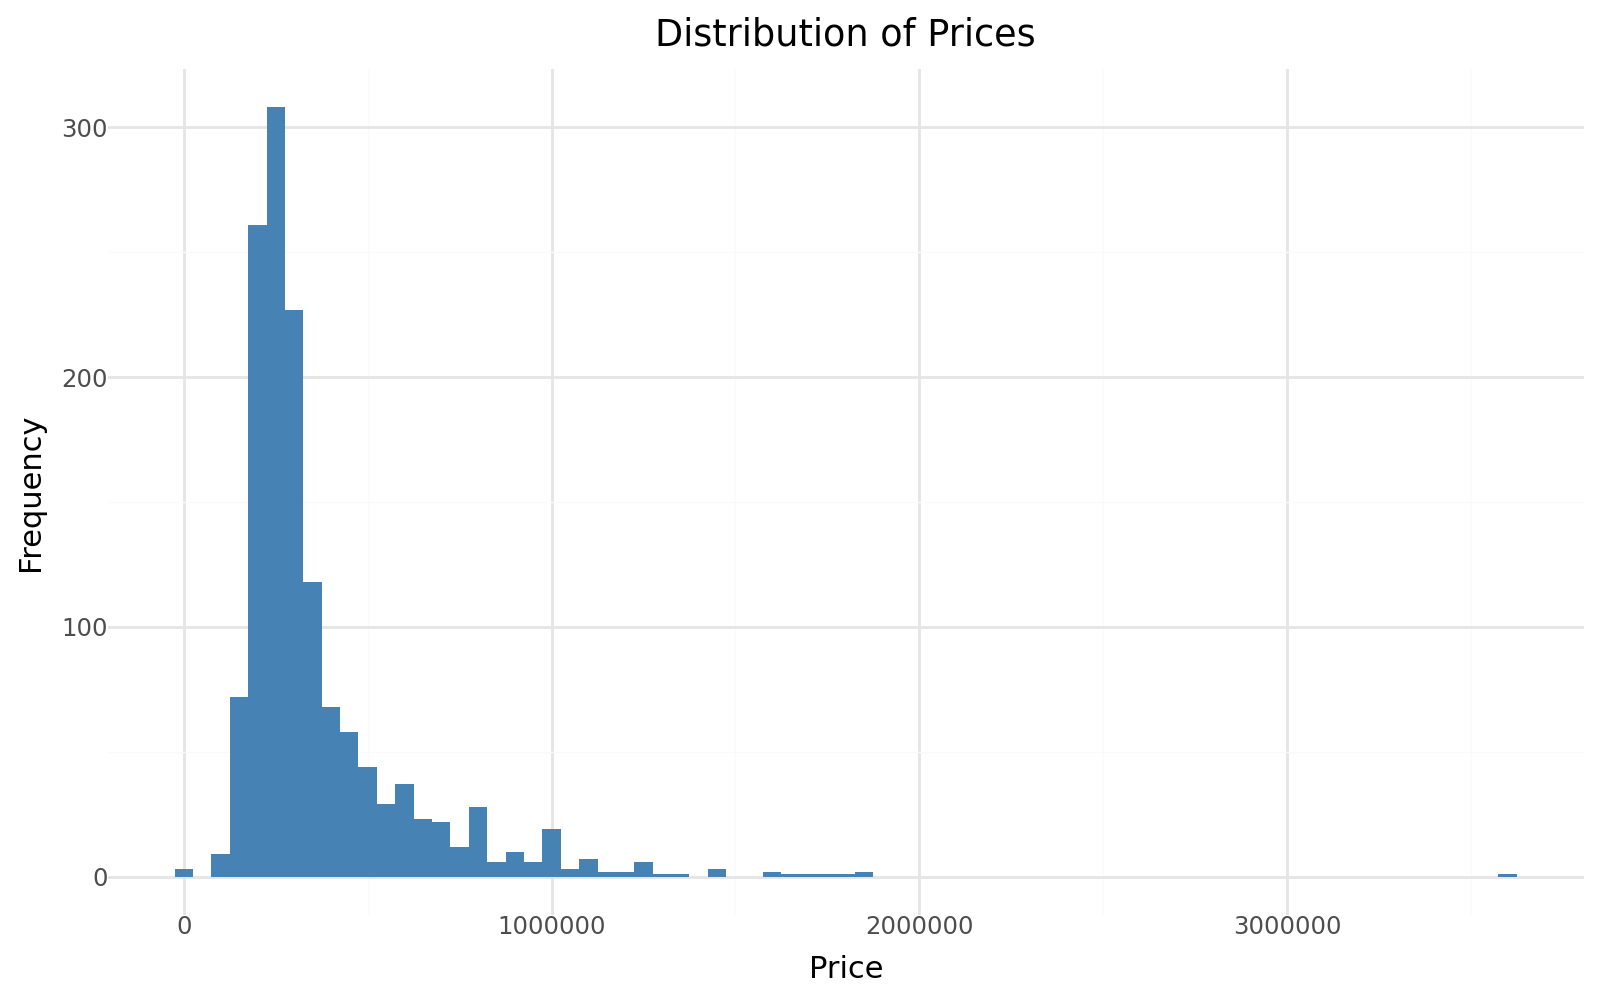

In [10]:
from plotnine import ggplot, aes, geom_histogram, labs, theme_minimal, theme

plot = (
    ggplot(clean, aes(x='Price')) +
    geom_histogram(binwidth=50000, fill='steelblue') +
    labs(title='Distribution of Prices', x='Price', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [11]:
clean = clean[clean['Price'] > 0]

In [12]:
clean.Price.describe().apply(lambda x: f"{x:,.0f}")

,Price
count,"1,392"
mean,"367,803"
std,"252,179"
min,"21,000"
25%,"230,000"
50%,"285,000"
75%,"400,000"
max,"3,600,000"


I looked up the observation that costs 21 000 and in the description it says it is 210 000 so I overwrite this value.

In [13]:
clean['Price'] = clean['Price'].replace(21000, 210000)

<ipython-input-13-bb837b2eb0e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
clean.Price.describe().apply(lambda x: f"{x:,.0f}")

,Price
count,"1,392"
mean,"367,939"
std,"252,043"
min,"80,000"
25%,"230,000"
50%,"285,000"
75%,"400,000"
max,"3,600,000"


**Address**

Cleaning the address variable, splitting it into variable one containing only the district and one containing only the street

In [15]:
clean[['valami', 'district']] = clean['Address'].str.split(',', expand=True)
clean[['street', 'valami2']] = clean['valami'].str.split('Budapest', expand=True)
clean.drop(columns=['valami', 'valami2', 'Address'], inplace=True)

<ipython-input-15-070ccf6cb583>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-15-070ccf6cb583>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-15-070ccf6cb583>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-15-070ccf6cb583>

In [16]:
district_counts = clean['district'].value_counts().reset_index()
district_counts.columns = ['district', 'count']

In [17]:
import plotly.express as px
fig2 = px.bar(district_counts, x = 'count', y = 'district',
              title = 'Number of listings per district',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

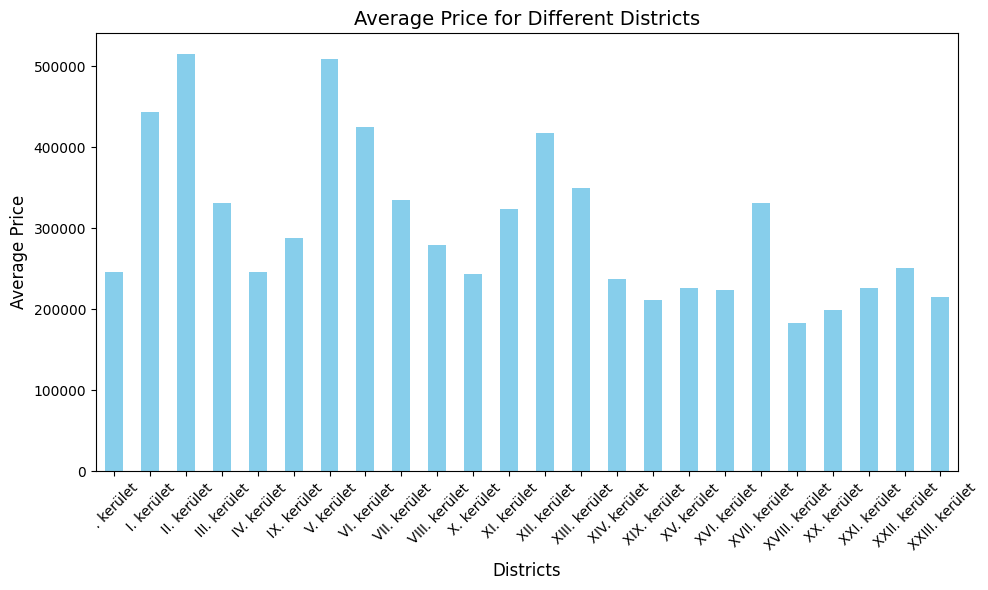

In [19]:
import matplotlib.pyplot as plt
average_price = clean.groupby('district')['Price'].mean()

plt.figure(figsize=(10, 6))
average_price.plot(kind='bar', color='skyblue')
plt.title('Average Price for Different Districts', fontsize=14)
plt.xlabel('Districts', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Common cost**

Cleaning the common_cost variable, removing the Ft/hó part, removing extra spaces and converting it to be numeric

In [20]:
clean[['new_common_cost', 'valami']] = clean['new_common_cost'].str.split('Ft/hó', expand=True)
clean['new_common_cost'] = clean['new_common_cost'].str.replace(r'\s+', '', regex=True)
clean['new_common_cost'] = pd.to_numeric(clean['new_common_cost'], errors='coerce')
clean.drop(columns=['valami'], inplace=True)

<ipython-input-20-5e1f2933b97c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-5e1f2933b97c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-5e1f2933b97c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-5e1f293

In [ ]:
clean.new_common_cost.describe()

,new_common_cost
count,1118.000000
mean,23955.277281
std,18436.655420
min,1000.000000
25%,15000.000000
50%,20000.000000
75%,30000.000000
max,309000.000000


In [ ]:
clean[clean['new_common_cost']<1500]

,Price,rooms_and_sqrt,other,link,new_number_of_balconies_variable,new_elavator_variable,new_sight,new_american_kitchen,new_furniture,new_heating_type,...,new_utilities_variable,new_utilities,new_building_type_variable,new_furniture_variable,new_number_of_rooms_variable,new_american_kitchen_variable,new_sight_variable,new_parking_variable,district,street
1259,330000.0,"1 szoba, 33 m2","Lakás jellemzők: Terasz, Biztonsági ajtó",https://www.alberlet.hu//kiado_alberlet/budape...,Erkélyek száma,Lift,Panorámás,None,"Berendezett, gépesített",Távfűtés,...,Rezsi költség,1 000 Ft/hó,Épület típusa,Berendezés,None,None,Kilátás,None,VIII. kerület,Corvin sétány
1295,1432000.0,"4 szoba, 185 m2","Lakás jellemzők: Fürdőkád, Külön WC, Nagy belm...",https://www.alberlet.hu//kiado_alberlet/budape...,None,Lift,Utcai,Van,"Berendezett, gépesített",Házközponti,...,Rezsi költség,1 000 Ft/hó,Épület típusa,Berendezés,None,Amerikai konyha,Kilátás,None,V. kerület,Sörház utca
1337,1023000.0,"3 szoba, 97 m2",NaN,https://www.alberlet.hu//kiado_alberlet/budape...,Erkélyek száma,None,Tetőkre néző,None,Luxus,Házközp. mérőórával,...,Rezsi költség,1 000 Ft/hó,Épület típusa,Berendezés,None,None,Kilátás,None,VI. kerület,Nagymező utca
1350,1227000.0,"4 szoba, 171 m2",NaN,https://www.alberlet.hu//kiado_alberlet/budape...,None,Lift,Utcai és udvari,None,"Berendezett, gépesített",Házközp. mérőórával,...,Rezsi költség,1 000 Ft/hó,Épület típusa,Berendezés,None,None,Kilátás,None,VI. kerület,Nagymező utca
1374,1207000.0,"3 szoba, 159 m2",NaN,https://www.alberlet.hu//kiado_alberlet/budape...,None,Lift,Utcai és udvari,None,Luxus,Házközp. mérőórával,...,Rezsi költség,1 000 Ft/hó,Épület típusa,Berendezés,None,None,Kilátás,None,V. kerület,Báthory utca


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 274 rows containing non-finite values.



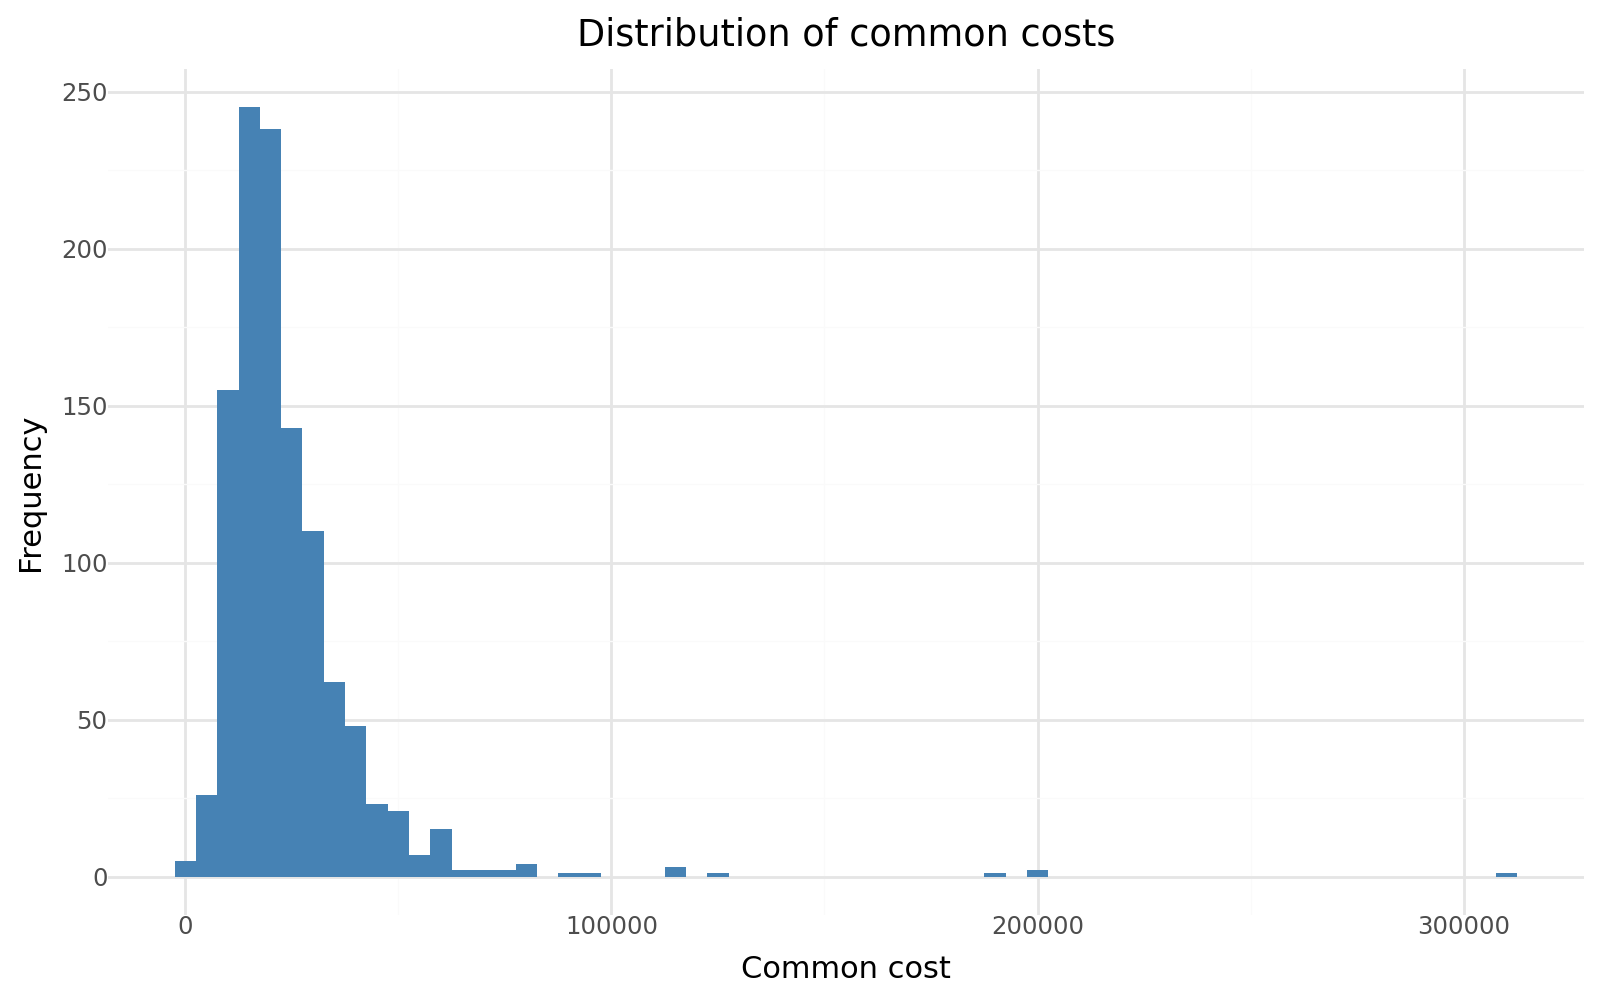

In [ ]:
plot = (
    ggplot(clean, aes(x='new_common_cost')) +
    geom_histogram(binwidth=5000, fill='steelblue') +
    labs(title='Distribution of common costs', x='Common cost', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [ ]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['new_common_cost'] > 100000, 'link']

,link
773,https://www.alberlet.hu//kiado_alberlet/budapest-XXIII-kerulet-szent-laszlo-utca-50m2-2-szoba_753967
1175,https://www.alberlet.hu//kiado_alberlet/budapest-I-kerulet-orszaghaz-utca-160m2-4-szoba_742394
1217,https://www.alberlet.hu//kiado_alberlet/budapest-I-kerulet-orszaghaz-utca-160m2-4-szoba_733105
1231,https://www.alberlet.hu//kiado_alberlet/budapest-I-kerulet-lovas-ut-105m2-3-szoba_729894
1232,https://www.alberlet.hu//kiado_alberlet/budapest-I-kerulet-lovas-ut-82m2-3-szoba_729890
1240,https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-meder-utca-83m2-4-szoba_728289
1332,https://www.alberlet.hu//kiado_alberlet/budapest-VII-kerulet-erzsebet-korut-288m2-11-szoba_670982
1333,https://www.alberlet.hu//kiado_alberlet/budapest-V-kerulet-dorottya-utca-135m2-3-szoba_670425


I looked up the observations and the one in Szent László utca has common cost of 30 900.

In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
clean.loc[(clean['new_common_cost'] == 309000) & (clean['street'] == 'Szent László utca'), 'new_common_cost'] = 30900

In [ ]:
clean.new_common_cost.describe()

,new_common_cost
count,1118.000000
mean,23706.529517
std,16344.772458
min,1000.000000
25%,15000.000000
50%,20000.000000
75%,30000.000000
max,200000.000000


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning:

stat_bin : Removed 274 rows containing non-finite values.



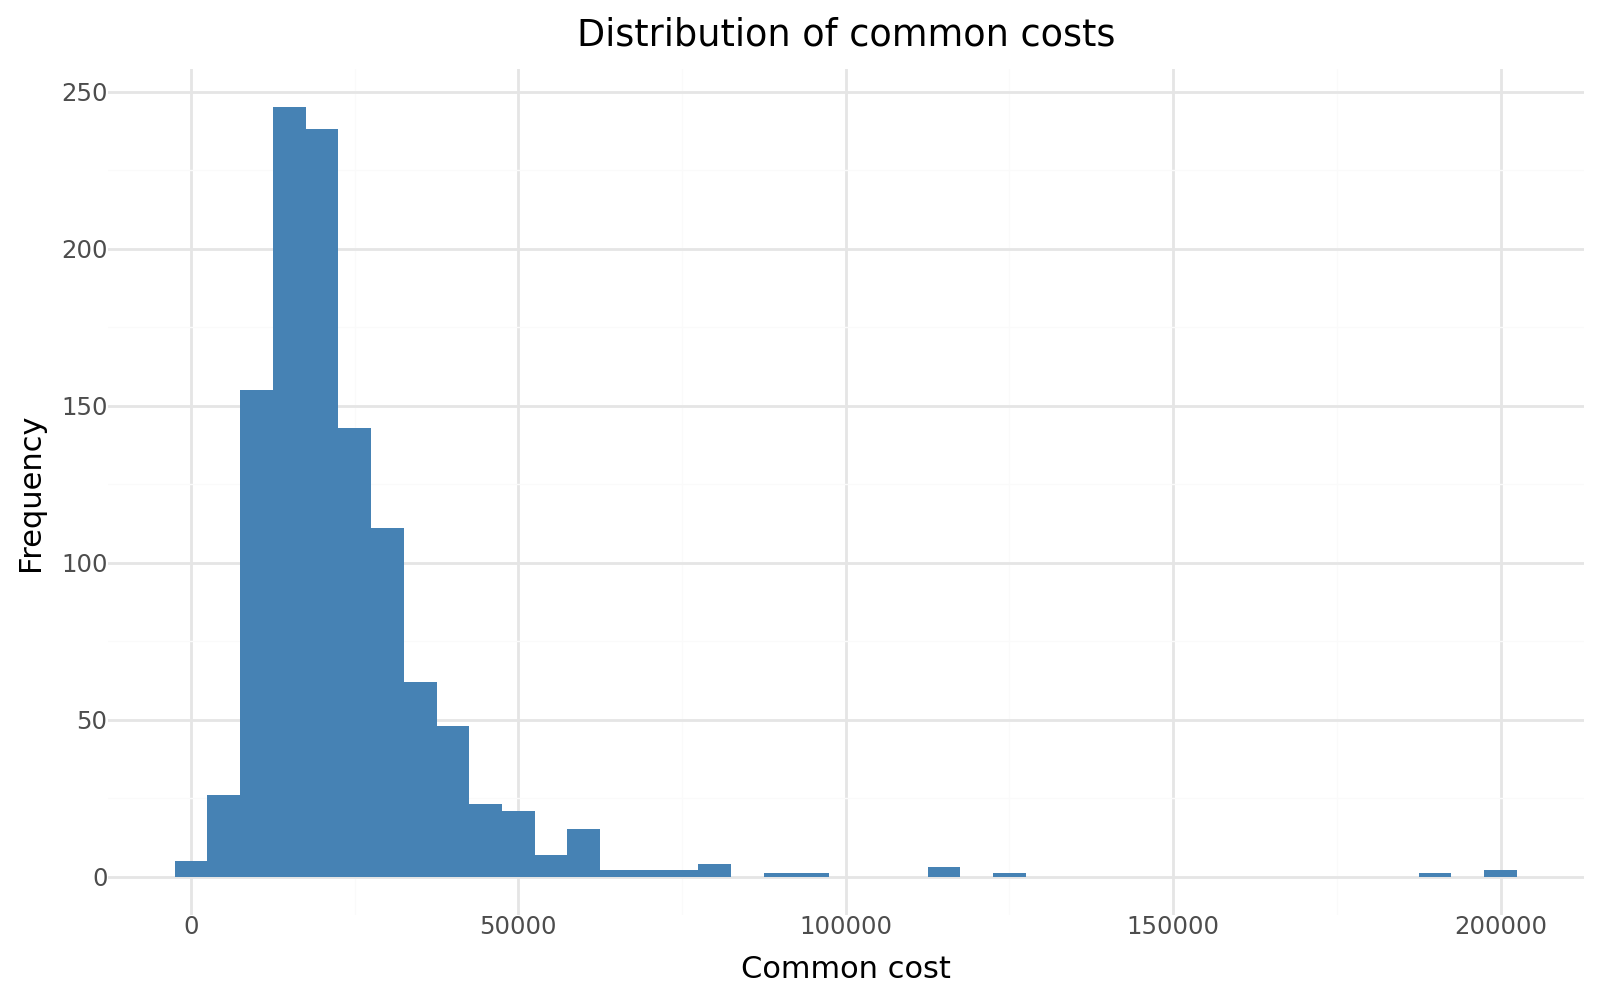

In [ ]:
plot = (
    ggplot(clean, aes(x='new_common_cost')) +
    geom_histogram(binwidth=5000, fill='steelblue') +
    labs(title='Distribution of common costs', x='Common cost', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

**Utilities**

Cleaning the utilities variable, removing the Ft/hó part, removing extra spaces and converting it to be numeric

In [ ]:
clean[['new_utilities', 'valami']] = clean['new_utilities'].str.split('Ft/hó', expand=True)
clean['new_utilities'] = clean['new_utilities'].str.replace(r'\s+', '', regex=True)
clean['new_utilities'] = pd.to_numeric(clean['new_utilities'], errors='coerce')
clean.drop(columns=['valami'], inplace=True)

<ipython-input-28-b0e4af4ece05>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-b0e4af4ece05>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-b0e4af4ece05>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-b0e4af4

In [ ]:
clean.new_utilities.describe().apply(lambda x: f"{x:,.0f}")

,new_utilities
count,902
mean,"41,039"
std,"329,890"
min,"1,000"
25%,"15,000"
50%,"20,000"
75%,"30,000"
max,"7,000,000"


In [ ]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['new_utilities']>1000000, 'link']

,link
115,https://www.alberlet.hu//kiado_alberlet/budapest-III-kerulet-gyogyszergyar-utca-41m2-2-szoba_755941
604,https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-kelenhegyi-ut-52m2-2-szoba_754714
698,https://www.alberlet.hu//kiado_alberlet/budapest-III-kerulet-kunigunda-utja--30m2-1-szoba_754379


In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
clean = clean[clean['new_utilities']<1000000]

In [ ]:
clean.new_utilities.describe().apply(lambda x: f"{x:,.0f}")

,new_utilities
count,899
mean,"22,266"
std,"11,879"
min,"1,000"
25%,"15,000"
50%,"20,000"
75%,"28,500"
max,"110,000"


In [ ]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['new_utilities']<1500, 'link']

,link
203,https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-csata-utca-40m2-1-szoba_755773
721,https://www.alberlet.hu//kiado_alberlet/budapest-V-kerulet-muzeum-korut-56m2-3-szoba_754305
1197,https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-andrassy-ut-120m2-3-szoba_737795
1259,https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-corvin-setany-33m2-1-szoba_723165
1264,https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-bajcsy-zsilinszky-ut-41m2-2-szoba_722258
1289,https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-raho-utca-75m2-3-szoba_712944
1295,https://www.alberlet.hu//kiado_alberlet/budapest-V-kerulet-sorhaz-utca-185m2-4-szoba_706225
1316,https://www.alberlet.hu//kiado_alberlet/budapest-II-kerulet-torokvesz-ut-130m2-4-szoba_687935
1337,https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-nagymezo-utca-97m2-3-szoba_657271
1350,https://www.alberlet.hu//kiado_alberlet/budapest-VI-kerulet-nagymezo-utca-171m2-4-szoba_639086


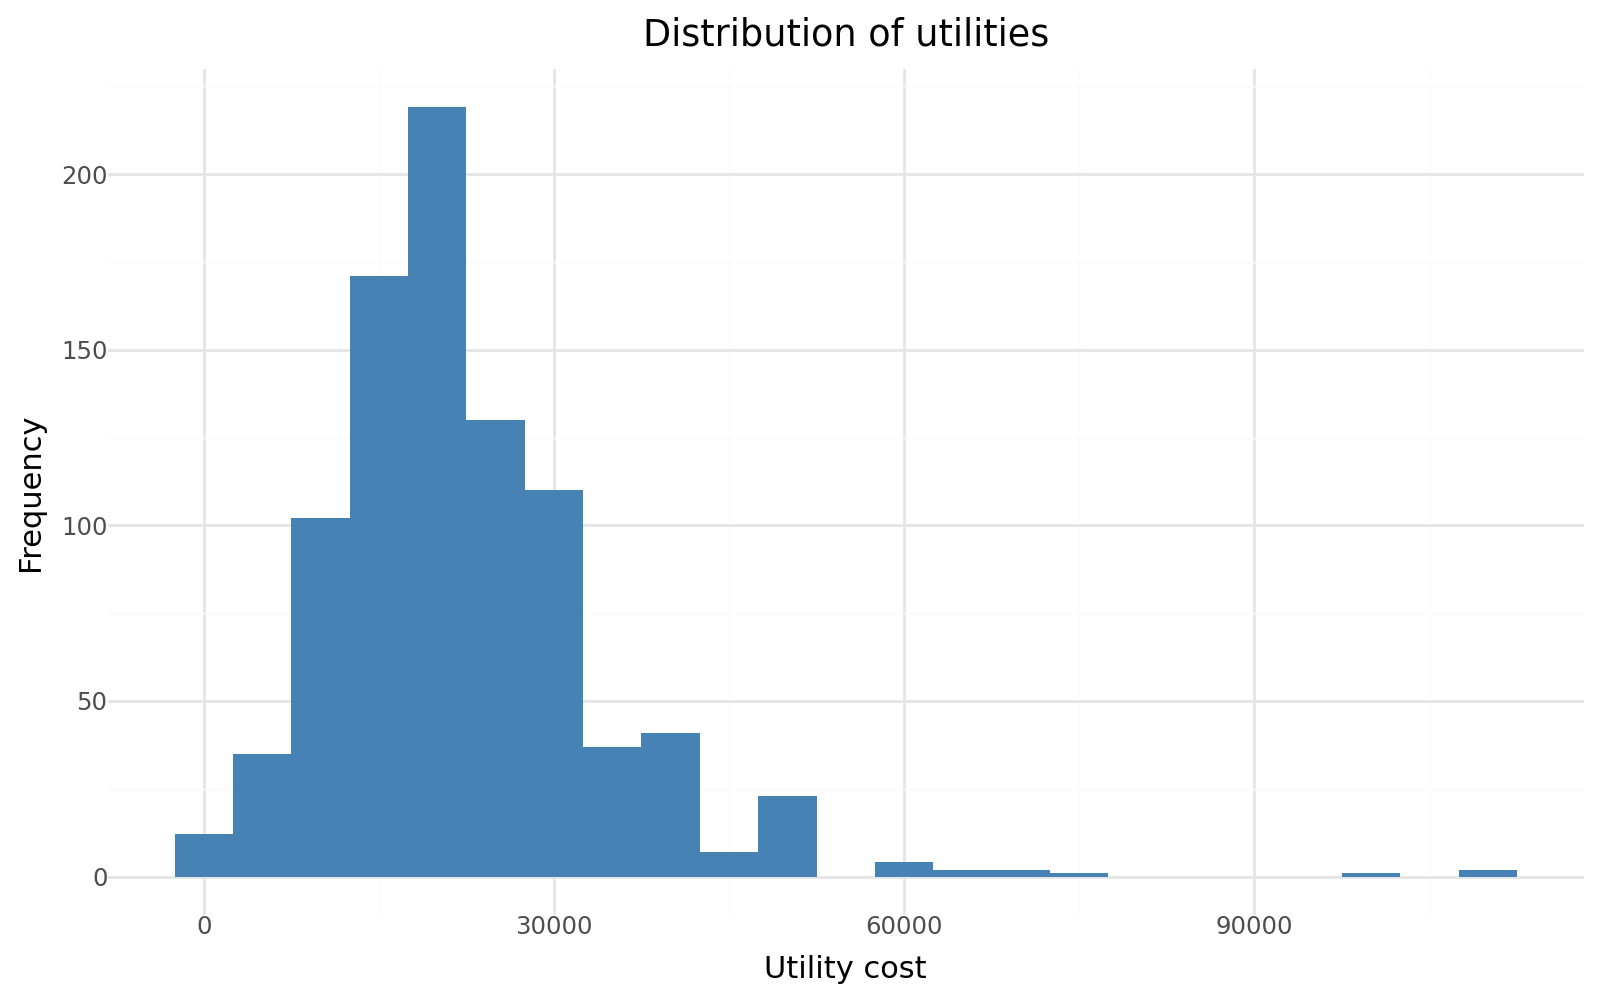

In [ ]:
plot = (
    ggplot(clean, aes(x='new_utilities')) +
    geom_histogram(binwidth=5000, fill='steelblue') +
    labs(title='Distribution of utilities', x='Utility cost', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

**Rooms and square meter**

cleaning the rooms_and_sqrt variable. First I split it into two variable one containing the number of rooms and one containing the square meters. Then I make two columns from the number of rooms variable, one containing the number of rooms and the second containing the number of half rooms.

In [ ]:
clean[['number_of_rooms', 'sqrt']] = clean['rooms_and_sqrt'].str.split(',', expand=True)

<ipython-input-36-ce061d050d63>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-ce061d050d63>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean[['meter2', 'valami']] = clean['sqrt'].str.split('m2', expand=True, n=1)
clean['meter2'] = pd.to_numeric(clean['meter2'], errors='coerce')
clean.drop(columns=['valami'], inplace=True)

<ipython-input-37-a60e30e6d583>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-a60e30e6d583>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-a60e30e6d583>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-a60e30e

In [ ]:
clean.meter2.describe()

,meter2
count,899.000000
mean,62.572859
std,35.199874
min,4.000000
25%,44.000000
50%,54.000000
75%,74.000000
max,650.000000


I checked the observation with 4 m^2 and in the description it is written that it is 40 m^2 so I corrected the mistake.

In [ ]:
clean['meter2'] = clean['meter2'].replace(4, 40)

<ipython-input-39-41521474f7ab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean.meter2.describe()

,meter2
count,899.000000
mean,62.612903
std,35.153613
min,18.000000
25%,44.000000
50%,54.000000
75%,74.000000
max,650.000000


In [ ]:
pd.set_option('display.max_colwidth', None)
clean.loc[clean['meter2']>600, 'link']

,link
1172,https://www.alberlet.hu//kiado_alberlet/budapest-IX-kerulet-illatos-ut-650m2-10-szoba_742419


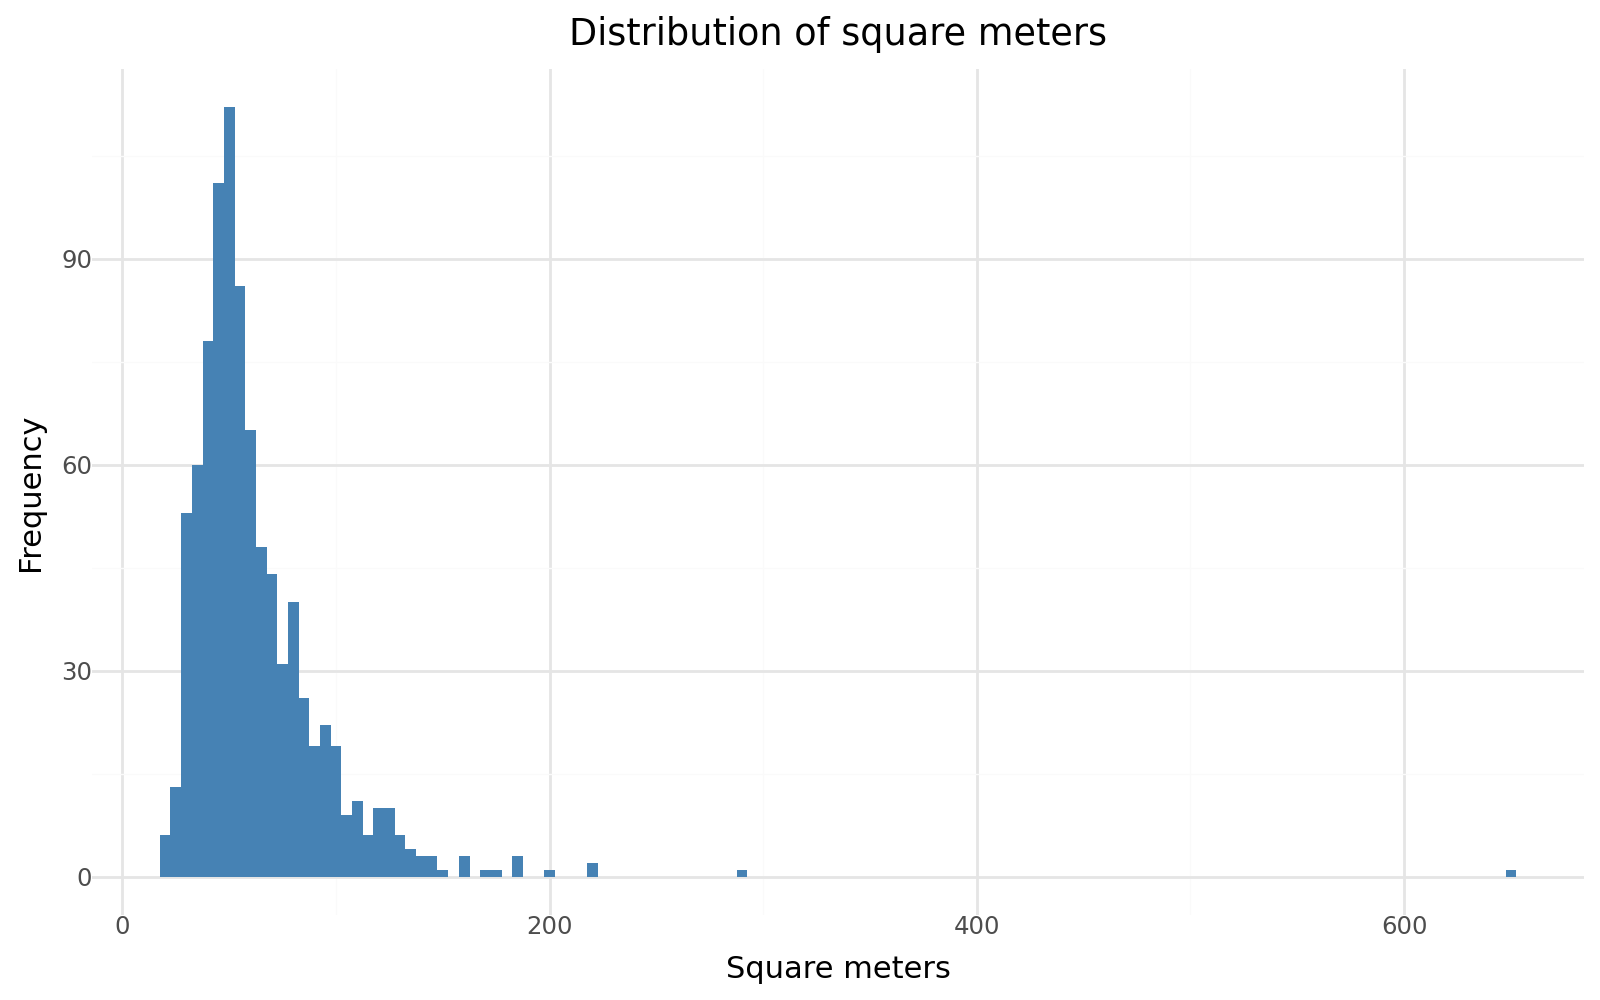

In [ ]:
plot = (
    ggplot(clean, aes(x='meter2')) +
    geom_histogram(binwidth=5, fill='steelblue') +
    labs(title='Distribution of square meters', x='Square meters', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [ ]:
clean[['rooms', 'halfrooms']] = clean['number_of_rooms'].str.split('+', expand=True, n=1)
clean[['n_rooms', 'room_t1']] = clean['rooms'].str.split(' ', expand=True, n=1)
clean['n_rooms'] = pd.to_numeric(clean['n_rooms'], errors='coerce')

In [ ]:
clean.n_rooms.value_counts()

,count
n_rooms,
1,322
2,314
3,204
4,53
5,2
6,2
10,1
11,1


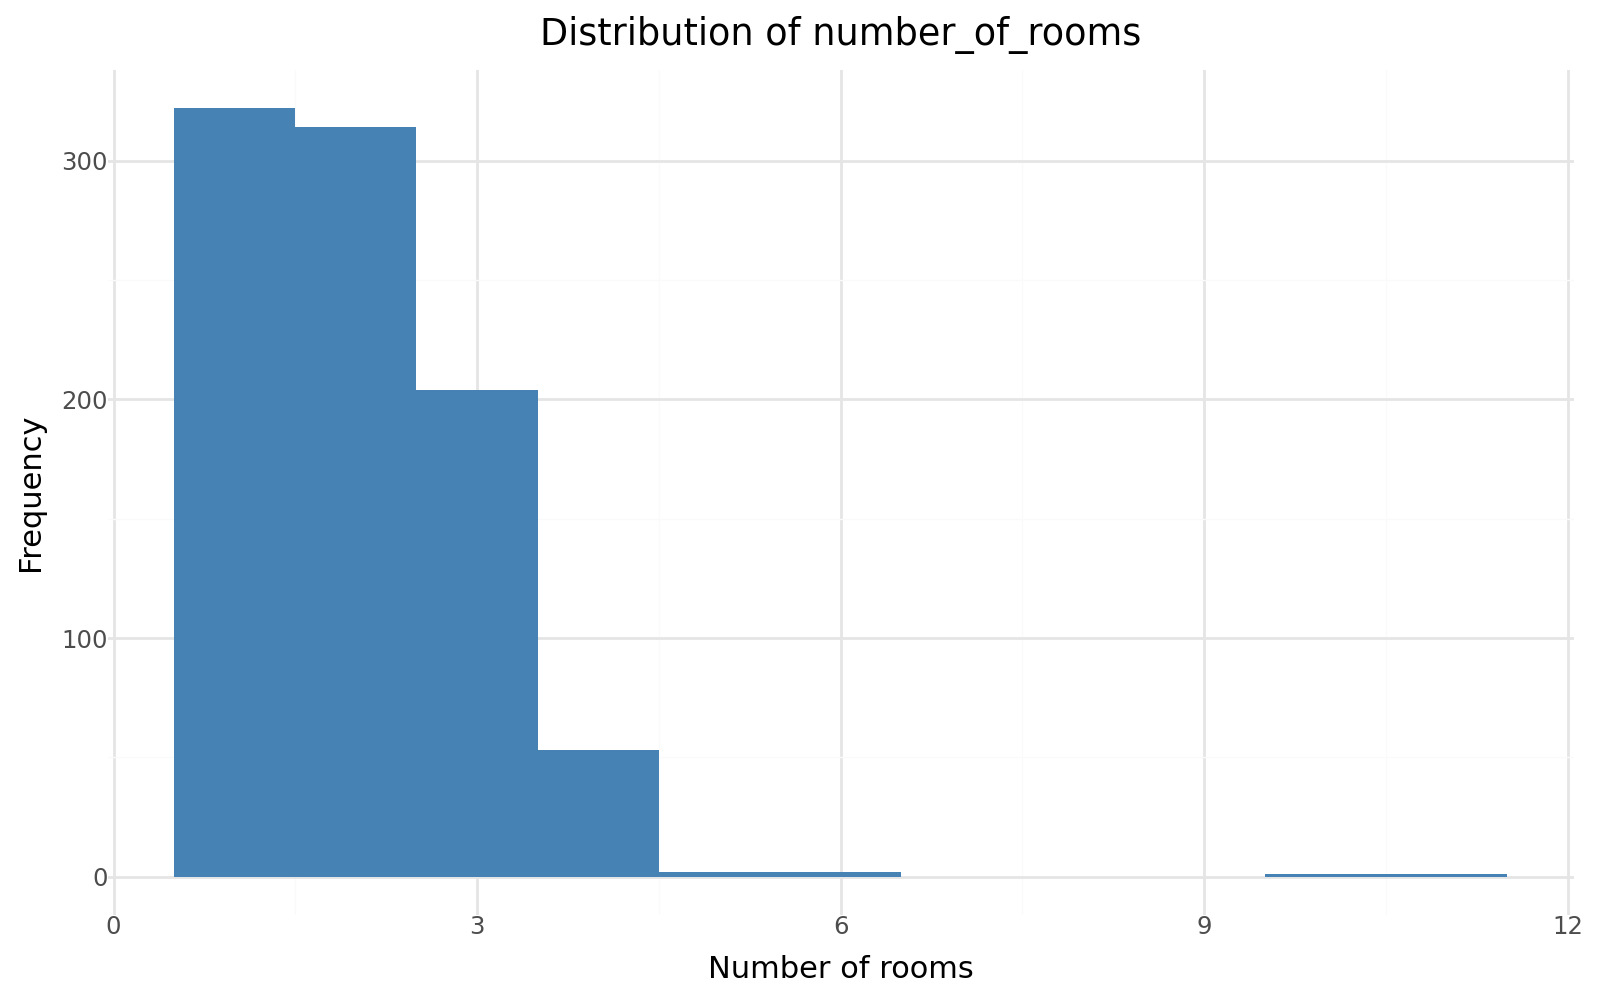

In [ ]:
plot = (
    ggplot(clean, aes(x='n_rooms')) +
    geom_histogram(binwidth=1, fill='steelblue') +
    labs(title='Distribution of number_of_rooms', x='Number of rooms', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [ ]:
clean.halfrooms.unique()

array([None, ' 1 félszoba', ' 2 félszoba', ' 3 félszoba'], dtype=object)

In [ ]:
def categorize_halfrooms(halfroom):
    if pd.isna(halfroom):
        return 0
    elif '1' in halfroom:
        return 1
    elif '2' in halfroom:
        return 2
    elif '3' in halfroom:
        return 3
    else:
        return 0

clean['n_halfrooms'] = clean['halfrooms'].apply(categorize_halfrooms)

In [ ]:
clean.n_halfrooms.value_counts()

,count
n_halfrooms,
0,706
1,149
2,43
3,1


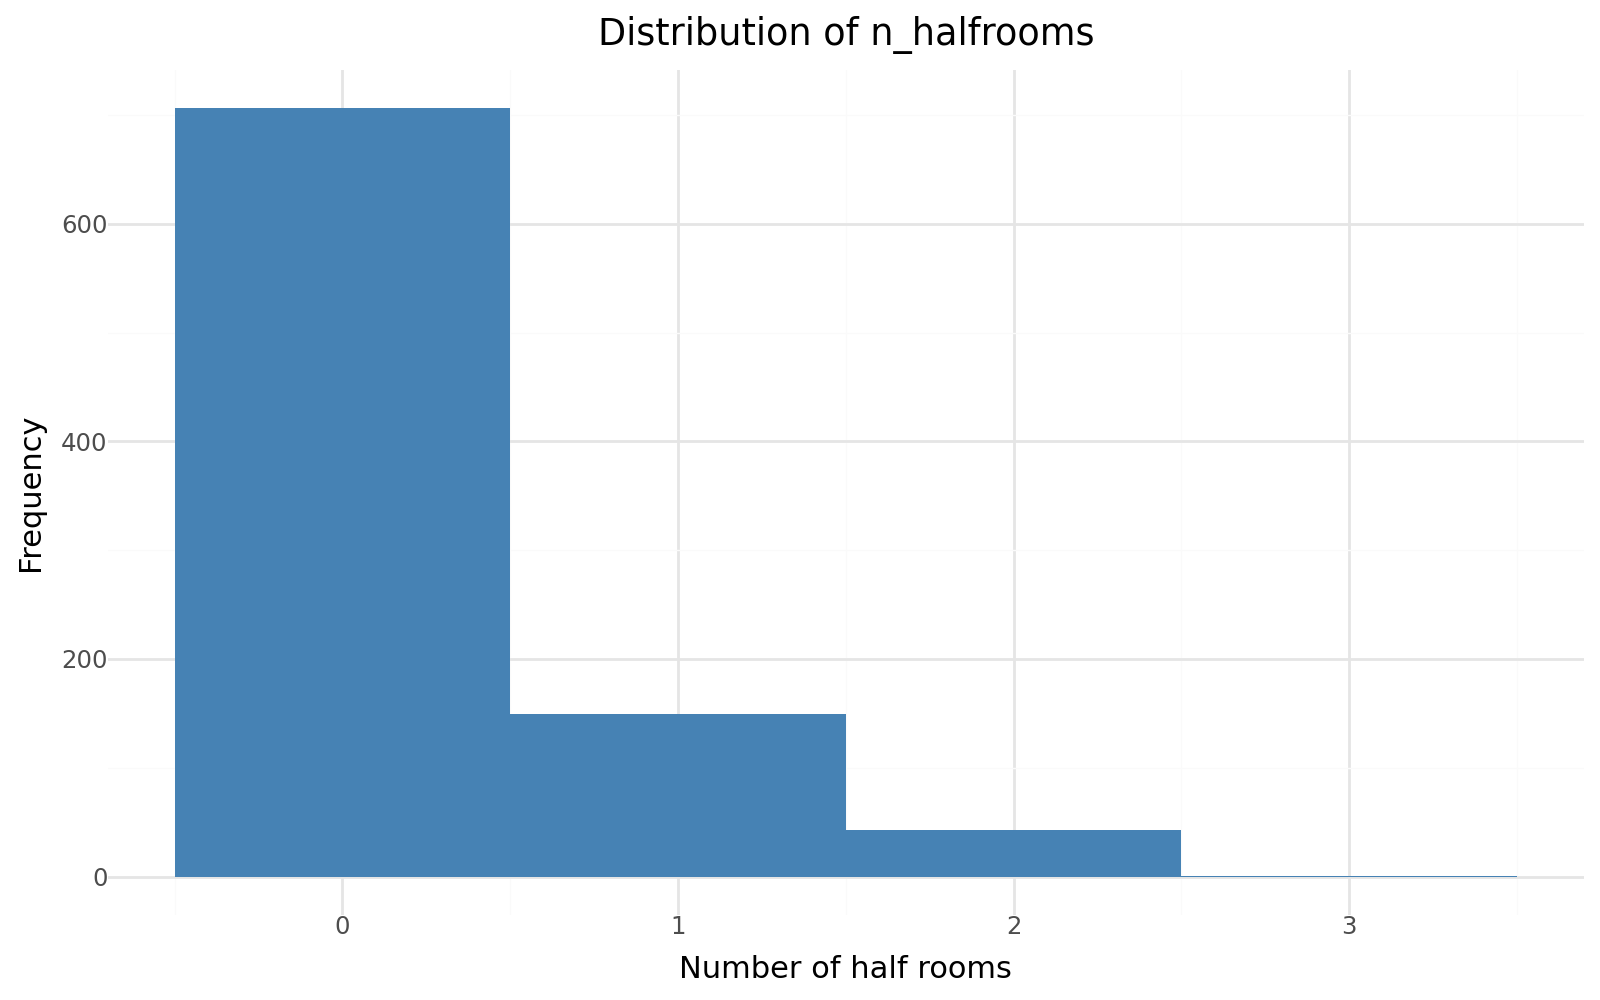

In [ ]:
plot = (
    ggplot(clean, aes(x='n_halfrooms')) +
    geom_histogram(binwidth=1, fill='steelblue') +
    labs(title='Distribution of n_halfrooms', x='Number of half rooms', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

In [ ]:
clean['total_n_rooms'] = clean['n_rooms']+0.5*clean['n_halfrooms']

In [ ]:
clean['total_n_rooms'].value_counts()

,count
total_n_rooms,
2.0,286
1.0,208
3.0,195
1.5,84
4.0,54
2.5,48
3.5,15
4.5,3
5.0,2


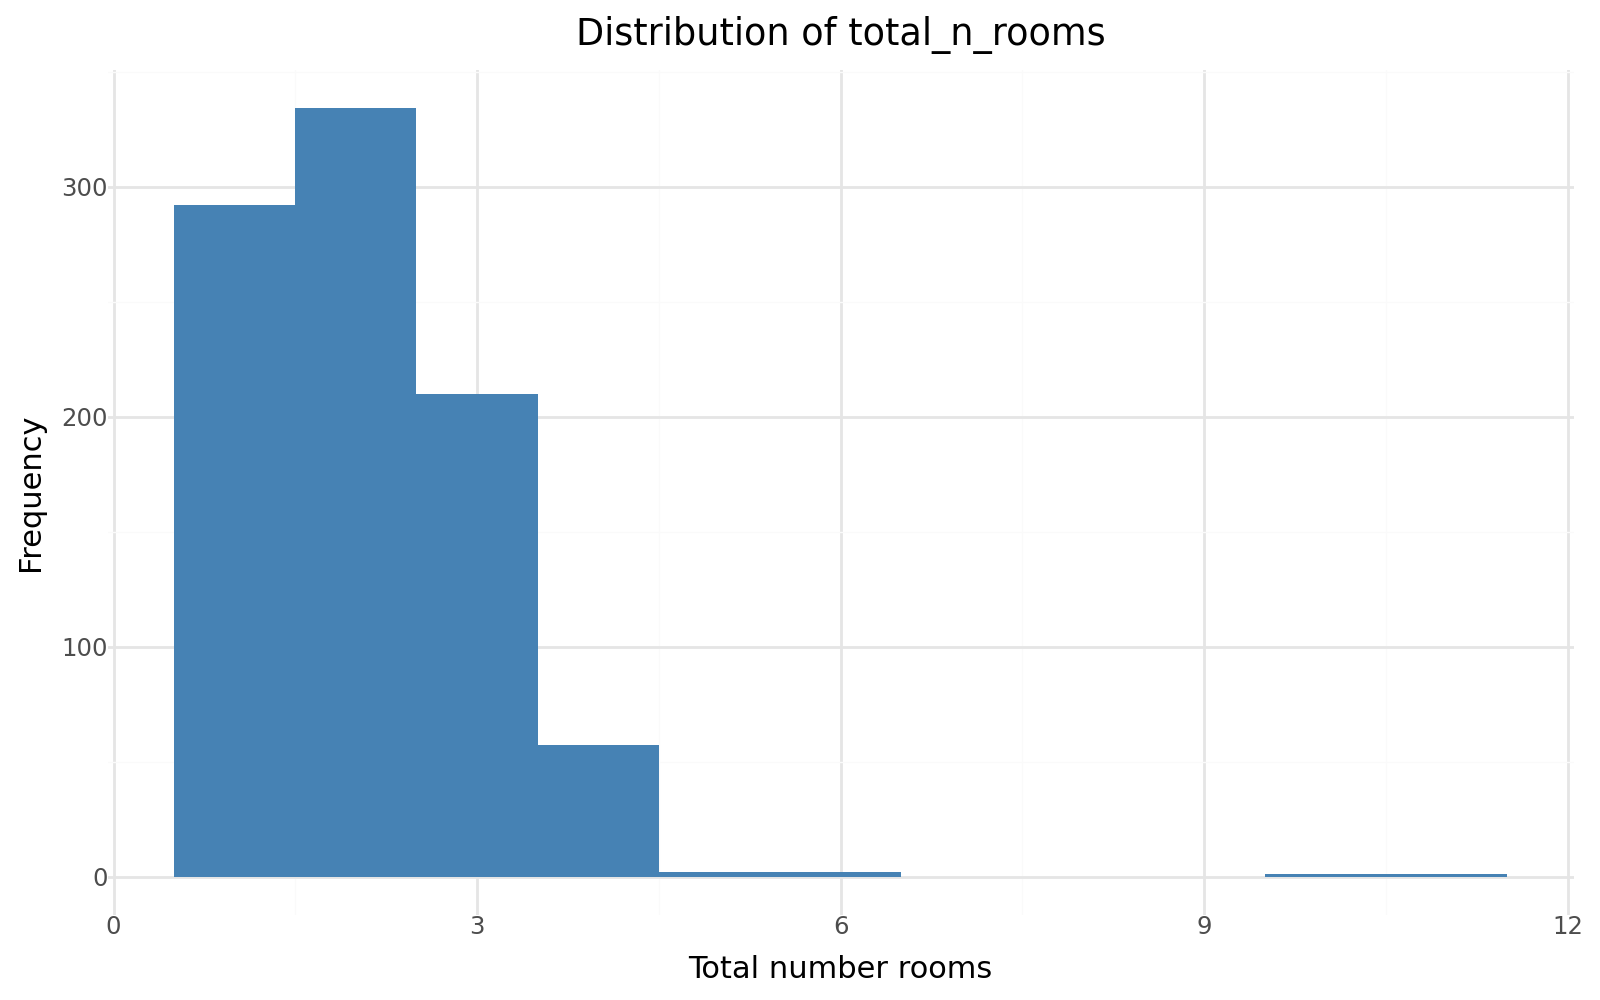

In [ ]:
plot = (
    ggplot(clean, aes(x='total_n_rooms')) +
    geom_histogram(binwidth=1, fill='steelblue') +
    labs(title='Distribution of total_n_rooms', x='Total number rooms', y='Frequency') +
    theme_minimal() +
    theme(figure_size=(8, 5))
)

display(plot)

**Building type**

In [ ]:
clean.new_building_type.unique()

array(['Lakás'], dtype=object)

It is clean

**Neighbourhood**

In [ ]:
clean.new_neighbourhood.unique()

array(['Angyalföld-Kertváros', 'Angyalföld', 'Kelenföld',
       'Józsefváros – Corvinnegyed', 'Orbánhegy', 'Belső-Erzsébetváros',
       'Belváros', 'Óbuda – Filatorigát', 'Sasad', 'Újlipótváros',
       'Istvánmező', 'Nagyzugló', None, 'Pacsirtatelep', 'Herminamező',
       'Mátyásföld', 'Zugló', 'Sashalom', 'Istenhegy', 'Vérhalom',
       'Belső-Terézváros', 'Középső-Erzsébetváros', 'Józsefváros',
       'Külső-Erzsébetváros – Ligetváros', 'Kúttó', 'Kurucles',
       'Újlipótváros – Rómaikert', 'Belső-Ferencváros', 'Újpest',
       'Kelenföldi lakótelep', 'Újlipótváros – Kleopátraház',
       'József Attila-lakótelep', 'II/A kerület – Széphalom', 'Őrmező',
       'Spanyolrét', 'Angyalföld – Fiastyúk utcai lakótelep',
       'Ferencváros', 'Szentimreváros',
       'Középső-Ferencváros – Rehabilitációs terület',
       'Alsórákos – Füredi utcai lakótelep', 'Erzsébetváros', 'Virányos',
       'Budatétény', 'Angyalföld – Lőportárdűlő',
       'Józsefváros – Palotanegyed', 'Újpesti lakót

It is clean

**Sight**

In [ ]:
clean.new_sight.unique()

array(['Utcai', 'Kertre néző', 'Utcai, világos', 'Udvari', 'Parkra néző',
       'Udvari, világos', None, 'Tetőkre néző', 'Utcai és udvari',
       'Panorámás', 'Utcai, csendes', 'Dunai', 'Városi panoráma',
       'Hegyvidéki panoráma', 'Udvari és tűzfal', 'Térre néző',
       'Utcai, forgalmas', 'Udvari, nem világos'], dtype=object)

It contains too many unnecessary variables

In [ ]:
def map_sight(value):
    if pd.isna(value):
        return None
    value = value.lower()
    if 'utca' in value:
        return 'utca'
    elif 'udvar' in value:
        return 'udvar'
    elif 'park' in value:
        return 'park'
    else:
        return 'other'

In [ ]:
clean['sight_small'] = clean['new_sight'].apply(map_sight)
clean.sight_small.unique()

array(['utca', 'other', 'udvar', 'park', None], dtype=object)

In [ ]:
sight_counts = clean['sight_small'].value_counts().reset_index()
sight_counts.columns = ['sight', 'count']

import plotly.express as px
fig2 = px.bar(sight_counts, x = 'count', y = 'sight',
              title = 'Number of listings based on sight type',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

**Floor**

In [ ]:
clean.new_floor.unique()

array(['5', '1', '4', '3', '2', 'Földszint', 'Magasföldszint', '10', '6',
       None, '8', 'Félemelet', '9', '7', 'Szuterén', 'Félszuterén',
       'Több mint 10', 'Tetőtér'], dtype=object)

In [ ]:
floor_counts = clean['new_floor'].value_counts().reset_index()
floor_counts.columns = ['floor', 'count']

import plotly.express as px
fig2 = px.bar(floor_counts, x = 'count', y = 'floor',
              title = 'Number of listings based on the floor',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

Magasfölszint az félemelet 0,5. félemelet is 0,5. szuterén és félszuterén -1. tetőtér legyen átlag

In [ ]:
def map_floor(floor):
    if floor in ['Tetőtér', 'Több mint 10']:
        return None
    elif floor == 'Földszint':
        return 0
    elif floor == 'Magasfölszint' or floor == 'Félemelet':
        return 0.5
    elif floor == 'Szuterén' or floor == 'Félszuterén':
        return -1
    else:
        return floor

clean['floor_numeric'] = clean['new_floor'].apply(map_floor)
clean['floor_numeric'] = pd.to_numeric(clean['floor_numeric'], errors='coerce')

This way, this column can be added to regressions as numeric variable.

In [ ]:
clean.floor_numeric.value_counts()

,count
floor_numeric,
1.0,185
2.0,180
3.0,115
4.0,99
0.0,94
5.0,49
6.0,25
8.0,16
7.0,14


**Heating type**

In [ ]:
clean.new_heating_type.unique()

array(['Házközponti', 'Mennyezeti hűtés-fűtés', 'Házközp. mérőórával',
       'Cirkó', 'Gáz, konvektor', 'Elektromos', 'Gázkazán', 'Távfűtés',
       'Padlófűtés', 'Villany, Nobo panel', 'Egyéb kazán', 'Klíma',
       'Távfűtés mérőórával', 'Gáz, MIKA kazán', 'Gáz, héra',
       'Villany, hőtárolós kályha', 'Falfűtés', 'Hőszivattyú', 'Egyéb',
       'Fan-coil', 'Villany, infrapanel', 'Hősugárzó'], dtype=object)

In [ ]:
heating_counts = clean['new_heating_type'].value_counts().reset_index()
heating_counts.columns = ['heating', 'count']

import plotly.express as px
fig2 = px.bar(heating_counts, x = 'count', y = 'heating',
              title = 'Number of listings based on the heating type',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

In [ ]:
def map_heating(heating_type):
    if heating_type in ['Házközponti', 'Házközp. mérőórával']:
        return 'Házközponti'
    elif heating_type in ['Távfűtés', 'Távfűtés mérőórával']:
        return 'Távfűtés'
    elif heating_type in ['Cirkó', 'Gázkonvektor', 'Gázkazán', 'Gáz, MIKA kazán', 'Gáz, héra']:
        return 'Gáz alapú'
    elif heating_type in ['Elektromos', 'Villany, Nobo panel', 'Villany, infrapanel', 'Hősugárzó']:
        return 'Elektromos'
    elif heating_type in ['Padlófűtés', 'Mennyezeti hűtés-fűtés', 'Klíma', 'Fan-coil']:
        return 'Padló vagy mennyezeti'
    elif heating_type in ['Egyéb kazán', 'Egyéb', 'Villany, hőtárolós kályha', 'Falfűtés', 'Hőszivattyú']:
        return 'Other'
    else:
        return 'Unknown'

clean['heating_small'] = clean['new_heating_type'].apply(map_heating)

In [ ]:
heating_counts = clean['heating_small'].value_counts().reset_index()
heating_counts.columns = ['heating', 'count']

import plotly.express as px
fig2 = px.bar(heating_counts, x = 'count', y = 'heating',
              title = 'Number of listings based on the heating type',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces( textposition = 'outside')

fig2.update_xaxes(visible = False)

**Furniture**

In [ ]:
clean.new_furniture.unique()

array(['Berendezett, gépesített', 'Üres, gépesített',
       'Részben berendezett, gépesített', 'Üres', 'Üres, berendezve is',
       'Berendezett, üresen is', 'Részben berendezett', None, 'Luxus',
       'Berendezett, új bútorok', 'Berendezett, IKEA, KIKA',
       'Berendezett, lakberendező által', 'Berendezett, nem gépesített'],
      dtype=object)

In [ ]:
furniture_counts = clean['new_furniture'].value_counts().reset_index()
furniture_counts.columns = ['furniture', 'count']

import plotly.express as px
fig2 = px.bar(furniture_counts, x = 'count', y = 'furniture',
              title = 'Number of listings based on the furnishment',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

fig2.update_xaxes(visible = False)

In [ ]:
def categorize_furnished(furniture):
    if pd.isna(furniture):
        return 'Na'
    elif 'üres' in furniture:
        return 'üres'
    elif 'részben' in furniture:
        return 'részben'
    else:
        return 'berendezett'

def categorize_machines(furniture):
    if pd.isna(furniture):
        return 'nem gépesített'
    elif 'gépesített' in furniture:
        return 'gépesített'
    else:
        return 'nem gépesített'

clean['furnished'] = clean['new_furniture'].apply(categorize_furnished)
clean['machines'] = clean['new_furniture'].apply(categorize_machines)

In [ ]:
furniture_counts = clean['furnished'].value_counts().reset_index()
furniture_counts.columns = ['furniture', 'count']

import plotly.express as px
fig2 = px.bar(furniture_counts, x = 'count', y = 'furniture',
              title = 'Number of listings based on the furnishment',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

fig2.update_xaxes(visible = False)

In [ ]:
machines_counts = clean['machines'].value_counts().reset_index()
machines_counts.columns = ['machines', 'count']

import plotly.express as px
fig2 = px.bar(machines_counts, x = 'count', y = 'machines',
              title = 'Number of listings based on the machines',
              template = 'simple_white',
              text_auto = True
              )

fig2.update_layout( xaxis_title = None, yaxis_title = None,
                   title_x = 0.5, yaxis_categoryorder = 'total ascending')

fig2.update_traces(texttemplate = '%{value:.2s}', textposition = 'outside')

fig2.update_xaxes(visible = False)

**Elavator**

In [ ]:
clean.new_elavator.value_counts()

,count
new_elavator,
Van,543
Nincs,61


**Cleaning the table**, dropping unused columns, renaming columns.

In [ ]:
clean.drop(columns=['new_sight_variable','new_neighbourhood_variable','new_common_cost_variable','new_furniture_variable','new_building_type_variable','new_elavator_variable',
                    'new_heating_type_variable','new_number_of_rooms_variable','new_floor_variable','new_utilities_variable', 'new_number_of_rooms',
                    'rooms', 'halfrooms', 'room_t1', 'number_of_rooms'], inplace=True)

In [ ]:
clean.head().T

,2,4,5,7,8
Price,260000.0,300000.0,270000.0,210000.0,320000.0
rooms_and_sqrt,"1 szoba, 43 m2","2 szoba, 50 m2","2 szoba, 42 m2","1 szoba, 32 m2","2 szoba, 75 m2"
other,"Lakás jellemzők: Aktív Internet, Fürdőkád, Ikea bútorok, Külön WC, Terasz, Biztonsági ajtó, Redőny, Műanyag ablak, Privát fürdőszoba","Lakás jellemzők: Fürdőkád, Kertkapcsolat, Külön WC, Terasz","Lakás jellemzők: Mosogatógép, Terasz, Zuhanyzó, Redőny","Lakás jellemzők: Aktív Internet, Fürdőkád, Terasz, Műanyag ablak","Lakás jellemzők: Aktív Internet, Külön étkező, Külön WC, Terasz, Zárható szobaajtó, Zuhanyzó, Redőny, Privát fürdőszoba"
link,https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-lehel-utca-43m2-1-szoba_689994,https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-jasz-utca-50m2-2-szoba_755981,https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-zsombor-utca-42m2-2-szoba_756000,https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-jozsef-korut-32m2-1-szoba_730123,https://www.alberlet.hu//kiado_alberlet/budapest-XII-kerulet-bartha-utca-75m2-2-szoba_755124
new_number_of_balconies_variable,Erkélyek száma,Erkélyek száma,Erkélyek száma,None,Erkélyek száma
new_sight,Utcai,Kertre néző,"Utcai, világos",Utcai,Kertre néző
new_american_kitchen,None,None,None,None,None
new_furniture,"Berendezett, gépesített","Üres, gépesített","Berendezett, gépesített","Berendezett, gépesített","Részben berendezett, gépesített"
new_heating_type,Házközponti,Mennyezeti hűtés-fűtés,Házközp. mérőórával,Házközp. mérőórával,Cirkó
new_common_cost,20000.0,15000.0,16000.0,9000.0,25000.0


In [ ]:
clean.rename(columns={
    'new_building_type': 'building_type',
    'new_utilities': 'utilities',
    'new_furniture': 'furniture',
    'new_floor': 'floor',
    'new_common_cost': 'common_cost',
    'new_sight': 'sight',
    'new_elavator': 'elavator',
    'new_american_kitchen': 'american_kitchen',
    'new_parking' : 'parking',
    'new_number_of_balconies': 'number_of_balconies',
    'new_number_of_floors' : 'number_of_floors'
}, inplace=True)

In [ ]:
clean.drop(columns=['new_number_of_balconies_variable', 'furniture', 'new_heating_type', 'new_number_of_floors_variable', 'new_energy_performance_certificate_variable',
                    'new_american_kitchen_variable', 'new_parking_variable', 'sqrt', 'sight'], inplace=True)

KeyError: "['new_number_of_balconies_variable', 'furniture', 'new_heating_type', 'new_number_of_floors_variable', 'new_energy_performance_certificate_variable', 'new_american_kitchen_variable', 'new_parking_variable', 'sqrt'] not found in axis"

In [ ]:
clean.head().T

,2,4,5,7,8
Price,260000.0,300000.0,270000.0,210000.0,320000.0
rooms_and_sqrt,"1 szoba, 43 m2","2 szoba, 50 m2","2 szoba, 42 m2","1 szoba, 32 m2","2 szoba, 75 m2"
other,"Lakás jellemzők: Aktív Internet, Fürdőkád, Ikea bútorok, Külön WC, Terasz, Biztonsági ajtó, Redőny, Műanyag ablak, Privát fürdőszoba","Lakás jellemzők: Fürdőkád, Kertkapcsolat, Külön WC, Terasz","Lakás jellemzők: Mosogatógép, Terasz, Zuhanyzó, Redőny","Lakás jellemzők: Aktív Internet, Fürdőkád, Terasz, Műanyag ablak","Lakás jellemzők: Aktív Internet, Külön étkező, Külön WC, Terasz, Zárható szobaajtó, Zuhanyzó, Redőny, Privát fürdőszoba"
link,https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-lehel-utca-43m2-1-szoba_689994,https://www.alberlet.hu//kiado_alberlet/budapest-XIII-kerulet-jasz-utca-50m2-2-szoba_755981,https://www.alberlet.hu//kiado_alberlet/budapest-XI-kerulet-zsombor-utca-42m2-2-szoba_756000,https://www.alberlet.hu//kiado_alberlet/budapest-VIII-kerulet-jozsef-korut-32m2-1-szoba_730123,https://www.alberlet.hu//kiado_alberlet/budapest-XII-kerulet-bartha-utca-75m2-2-szoba_755124
sight,Utcai,Kertre néző,"Utcai, világos",Utcai,Kertre néző
american_kitchen,None,None,None,None,None
common_cost,20000.0,15000.0,16000.0,9000.0,25000.0
building_type,Lakás,Lakás,Lakás,Lakás,Lakás
floor,5,1,1,4,1
elavator,Van,Van,Van,None,None


# **Modelling**

In [ ]:
clean['lnprice']=np.log(clean['Price'])

In [ ]:
clean["utca"] = (clean["sight_small"] == 'utca').astype(int)
clean["other"] = (clean["sight_small"] == 'other').astype(int)
clean["udvar"] = (clean["sight_small"] == 'udvar').astype(int)
clean["park"] = (clean["sight_small"] == 'park').astype(int)

In [ ]:
clean["american_kitchen01"] = (clean["american_kitchen"] == 'Van').astype(int)

In [ ]:
clean["balcony1"] = (clean["number_of_balconies"] == '1').astype(int)
clean["balcony2"] = (clean["number_of_balconies"] == '2').astype(int)
clean["balcony3"] = (clean["number_of_balconies"] == '3').astype(int)

clean["balcony"] = clean["number_of_balconies"].apply(lambda x: 1 if str(x) in ["1", "2", "3"] else 0)

In [ ]:
clean["district1"] = (clean["district"] == ' I. kerület').astype(int)
clean["district2"] = (clean["district"] == ' II. kerület').astype(int)
clean["district3"] = (clean["district"] == ' III. kerület').astype(int)
clean["district4"] = (clean["district"] == ' IV. kerület').astype(int)
clean["district5"] = (clean["district"] == ' V. kerület').astype(int)
clean["district6"] = (clean["district"] == ' VI. kerület').astype(int)
clean["district7"] = (clean["district"] == ' VII. kerület').astype(int)
clean["district8"] = (clean["district"] == ' VIII. kerület').astype(int)
clean["district9"] = (clean["district"] == ' IX. kerület').astype(int)
clean["district10"] = (clean["district"] == ' X. kerület').astype(int)
clean["district11"] = (clean["district"] == ' XI. kerület').astype(int)
clean["district12"] = (clean["district"] == ' XII. kerület').astype(int)
clean["district13"] = (clean["district"] == ' XIII. kerület').astype(int)
clean["district14"] = (clean["district"] == ' XIV. kerület').astype(int)
clean["district15"] = (clean["district"] == ' XV. kerület').astype(int)
clean["district16"] = (clean["district"] == ' XVI. kerület').astype(int)
clean["district17"] = (clean["district"] == ' XVII. kerület').astype(int)
clean["district18"] = (clean["district"] == ' XVIII. kerület').astype(int)
clean["district19"] = (clean["district"] == ' XIX. kerület').astype(int)
clean["district20"] = (clean["district"] == ' XX. kerület').astype(int)
clean["district21"] = (clean["district"] == ' XXI. kerület').astype(int)
clean["district22"] = (clean["district"] == ' XXII. kerület').astype(int)
clean["district23"] = (clean["district"] == ' XXIII. kerület').astype(int)

In [ ]:
clean["elavator1"] = (clean["elavator"] == 'Van').astype(int)

In [ ]:
clean["elavator1"].value_counts()

,count
elavator1,
1,543
0,356


In [ ]:
clean["gaz"] = (clean["heating_small"] == 'Házközponti').astype(int)
clean["tav"] = (clean["heating_small"] == 'Távfűtés').astype(int)
clean["padlomenny"] = (clean["heating_small"] == 'Padló vagy mennyezeti').astype(int)
clean["elektromos"] = (clean["heating_small"] == 'Elektromos').astype(int)

In [ ]:
clean["gepesitett"] = (clean["machines"] == 'gépesített').astype(int)

In [ ]:
formula = (
    "lnprice ~  utilities + common_cost + american_kitchen01 + "
    "floor_numeric + elavator1 + meter2 + n_rooms + n_halfrooms + balcony1 + "
    "balcony2 + balcony3 + other + udvar + park + district1 + district2 + "
    "district3 + district4 + district5 + district6 + district7 + district8 + "
    "district9 + district10 + district11 + district12 + district14 + "
    "district15 + district16 + district17 + district18 + district19 + "
    "district20 + district21 + district22 + district23 + gaz + tav + padlomenny + "
    "elektromos + berendezett + gepesitett"
)

log = smf.ols(formula=formula, data=clean).fit(cov_type="HC1")
log.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 42, but rank is 40



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     39.14
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          4.02e-154
Time:                        08:13:04   Log-Likelihood:                -78.801
No. Observations:                 776   AIC:                             239.6
Df Residuals:                     735   BIC:                             430.4
Df Model:                          40                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.5745      0.099    117.249      0.000      11.381      11.768
utilities           2.791e-06   1.19e-06      2.336      0.019    4.49e-07    5.13e-06
common_cost          3.46e-06   1.47e-06      2.361      0.018    5.87e-07    6.33e-06
american_kitchen01     0.0700      0.024      2.879      0.004       0.022       0.118
floor_numeric          0.0141      0.006      2.503      0.012       0.003       0.025
elavator1              0.0921      0.028      3.254      0.001       0.037       0.148
meter2                 0.0033      0.002      1.425      0.154      -0.001       0.008
n_rooms                0.1840      0.051      3.622      0.000       0.084       0.284
n_halfrooms            0.1032      0.031      3.322      0.001       0.042       0.164
balcony1               0.0487      0.023      2.163      0.031       0.005       0.093
balcony2               0.1430      0.070      2.039      0.041       0.006       0.281
balcony3              -0.0540      0.040     -1.363      0.173      -0.132       0.024
other                  0.0677      0.028      2.441      0.015       0.013       0.122
udvar                 -0.0589      0.027     -2.215      0.027      -0.111      -0.007
park                  -0.0088      0.034     -0.258      0.796      -0.075       0.058
district1              0.0935      0.079      1.182      0.237      -0.062       0.249
district2              0.1879      0.060      3.116      0.002       0.070       0.306
district3             -0.1571      0.039     -3.984      0.000      -0.234      -0.080
district4             -0.1534      0.050     -3.060      0.002      -0.252      -0.055
district5              0.2987      0.053      5.666      0.000       0.195       0.402
district6              0.1865      0.049      3.819      0.000       0.091       0.282
district7             -0.0041      0.060     -0.068      0.945      -0.121       0.113
district8              0.0029      0.042      0.069      0.945      -0.080       0.086
district9             -0.1106      0.042     -2.631      0.009      -0.193      -0.028
district10            -0.1018      0.051     -2.000      0.045      -0.202      -0.002
district11            -0.0367      0.035     -1.059      0.290      -0.105       0.031
district12             0.1172      0.047      2.483      0.013       0.025       0.210
district14            -0.1597      0.036     -4.475      0.000      -0.230      -0.090
district15            -0.1773      0.163     -1.089      0.276      -0.496       0.142
district16            -0.1935      0.058     -3.315      0.001      -0.308      -0.079
district17         -8.133e-17   2.76e-17     -2.944      0.003   -1.35e-16   -2.72e-17
district18            -0.2280      0.152     -1.504      0.133      -0.525       0.069
district19            -0.2818      0.0

In [ ]:
formula = (
    "lnprice ~  utilities + common_cost + american_kitchen01 + "
    "floor_numeric + elavator1 + meter2 + n_rooms + n_halfrooms + balcony + "
    "district1 + district2 + district3 + district4 + district5 + district6 + district7 + district8 +"
    "district9 + district10 + district11 + district12 + district14 + district15 + district16 + district17 + district18 + district19 + "
    "district20 + district21 + district22 + district23 + gaz + tav + padlomenny + "
    "elektromos + berendezett + gepesitett"
)

log = smf.ols(formula=formula, data=clean).fit(cov_type="HC1")
log.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 37, but rank is 35



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     40.90
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          4.49e-148
Time:                        08:13:50   Log-Likelihood:                -88.987
No. Observations:                 776   AIC:                             250.0
Df Residuals:                     740   BIC:                             417.5
Df Model:                          35                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.5484      0.095    121.458      0.000      11.362      11.735
utilities            2.96e-06   1.23e-06      2.401      0.016    5.44e-07    5.38e-06
common_cost         3.871e-06    1.5e-06      2.588      0.010     9.4e-07     6.8e-06
american_kitchen01     0.0737      0.024      3.013      0.003       0.026       0.122
floor_numeric          0.0172      0.006      2.966      0.003       0.006       0.028
elavator1              0.0936      0.028      3.335      0.001       0.039       0.149
meter2                 0.0033      0.002      1.384      0.167      -0.001       0.008
n_rooms                0.1916      0.052      3.714      0.000       0.091       0.293
n_halfrooms            0.1069      0.031      3.412      0.001       0.046       0.168
balcony                0.0679      0.022      3.137      0.002       0.025       0.110
district1              0.0988      0.077      1.284      0.199      -0.052       0.250
district2              0.2188      0.064      3.400      0.001       0.093       0.345
district3             -0.1473      0.039     -3.780      0.000      -0.224      -0.071
district4             -0.1549      0.045     -3.446      0.001      -0.243      -0.067
district5              0.2844      0.053      5.380      0.000       0.181       0.388
district6              0.1656      0.048      3.419      0.001       0.071       0.261
district7             -0.0300      0.060     -0.499      0.618      -0.148       0.088
district8             -0.0086      0.042     -0.205      0.838      -0.091       0.074
district9             -0.1170      0.042     -2.788      0.005      -0.199      -0.035
district10            -0.1009      0.050     -2.030      0.042      -0.198      -0.003
district11            -0.0306      0.035     -0.877      0.381      -0.099       0.038
district12             0.1465      0.048      3.056      0.002       0.053       0.240
district14            -0.1519      0.036     -4.194      0.000      -0.223      -0.081
district15            -0.1349      0.153     -0.879      0.379      -0.435       0.166
district16            -0.2008      0.061     -3.295      0.001      -0.320      -0.081
district17          8.188e-16   2.47e-17     33.177      0.000     7.7e-16    8.67e-16
district18            -0.2724      0.145     -1.876      0.061      -0.557       0.012
district19            -0.2825      0.080     -3.552      0.000      -0.438      -0.127
district20            -0.3132      0.076     -4.118      0.000      -0.462      -0.164
district21            -0.4148      0.078     -5.298      0.000      -0.568      -0.261
district22            -0.1025      0.072     -1.433      0.152      -0.243       0.038
district23           2.93e-16   2.74e-17     10.699      0.000    2.39e-16    3.47e-16
gaz                    0.0287      0.0